# Programming IBM Superconducting Qubits with Qiskit  (Part 1/2)

## Rudy Raymond H.P. (Doctor of Informatics, Kyoto University)

## IBM Research 

Please visit www.qiskit.org for more details on an open source quantum computing framework for writing quantum experiments, programs, and applications.

In [1]:
import slides

Hello Taiwan, Hello NTU, Hello IBM QuaNTUm ... 


In [2]:
slides.ntu()

In [3]:
slides.lab()

In [4]:
slides.system()

In [5]:
slides.transmon()

In [6]:
slides.superposition()

In [7]:
slides.interference()

In [8]:
slides.entangled()

In [9]:
slides.algorithm()

In [10]:
slides.ibmqx()

True

In [11]:
slides.qiskit()

True

In [12]:
slides.elements()

In [13]:
slides.git()

True

In [14]:
from qiskit import IBMQ

IBMQ.delete_accounts()
#public account
PubAPItoken="d05e9f4bd7c3c44abc479d5024349ae556b78df9dd26fc09bdae0ab12e432fd29da1ac218d0513408764fce1182d404de91e1fa4ca3f59c17da9ae5615e159e2"
IBMQ.save_account(PubAPItoken, overwrite=True)
#hub account
config = {
      'url1': 'https://q-console-api.mybluemix.net/api/Hubs/ibm-q-internal/Groups/research/Projects/ibmq-tokyo',
      'url2': 'https://q-console-api.mybluemix.net/api/Hubs/ibm-q-internal/Groups/support/Projects/default'
      }

#https://q-console-api.mybluemix.net/api/Hubs/ibm-q-internal/Groups/research/Projects/melbourne

HubAPItoken = '30f9bee04302e1fa543880f72635b525f1e70ed212e43abd3a280f37ad3c2a44b8db13c57b8410da5bdabe26dc49296586745e41c46b1a215408ae31492c53fb'
IBMQ.save_account(HubAPItoken, config['url2'])

In [15]:
IBMQ.load_accounts()
#if there's a trouble see: https://github.com/Qiskit/qiskit-tutorial/blob/master/INSTALL.md

In [16]:
IBMQ.stored_accounts()

[{'token': 'd05e9f4bd7c3c44abc479d5024349ae556b78df9dd26fc09bdae0ab12e432fd29da1ac218d0513408764fce1182d404de91e1fa4ca3f59c17da9ae5615e159e2',
  'url': 'https://quantumexperience.ng.bluemix.net/api'},
 {'token': '30f9bee04302e1fa543880f72635b525f1e70ed212e43abd3a280f37ad3c2a44b8db13c57b8410da5bdabe26dc49296586745e41c46b1a215408ae31492c53fb',
  'url': 'https://q-console-api.mybluemix.net/api/Hubs/ibm-q-internal/Groups/support/Projects/default'}]

In [17]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, support, default)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, support, default)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-internal, support, default)>]

In [18]:
IBMQ.backends(n_qubits=20)

[<IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, support, default)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-internal, support, default)>]

In [19]:
from qiskit.providers.ibmq import least_busy
least_busy(IBMQ.backends(n_qubits=20))

<IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-internal, support, default)>

In [20]:
for backend in IBMQ.backends(simulator=False):
    print(backend.status())

BackendStatus(backend_name='ibmqx4', backend_version='1.0.0', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=16, status_msg='active')
BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmq_poughkeepsie', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')


In [21]:
slides.ibmq_qcc()

In [22]:
slides.quantum()

thanks omgcatsinspace for the permission to use the quantum cat

In [23]:
slides.model()

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
from qiskit import BasicAer as Aer

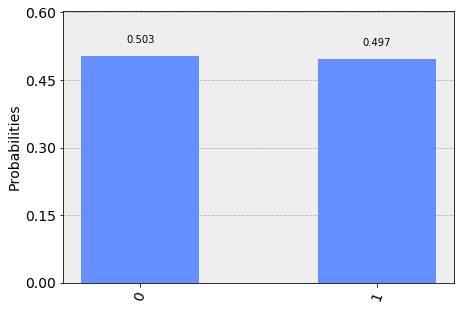

In [25]:
# Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuit
qc = QuantumCircuit(q, c)
qc.h(q)

#-----

qc.measure(q, c)

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()

# Display the result
plot_histogram(result.get_counts(qc))

/Users/rraymondhp/miniconda3/envs/QISKitenv/lib/python3.6/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)


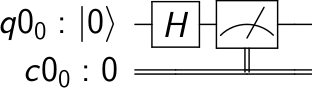

In [26]:
circuit_drawer(qc)

/Users/rraymondhp/miniconda3/envs/QISKitenv/lib/python3.6/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)


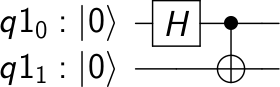

In [27]:
# Quantum Registers
q = QuantumRegister(2)

# Build the circuit
bell = QuantumCircuit(q)
bell.h(q[0])
bell.cx(q[0], q[1])

# Draw the circuit
circuit_drawer(bell)

In [ ]:
c2 = ClassicalRegister(2)

# Measurement in standard basis
meas_zi = QuantumCircuit(q, c) 
meas_zi.measure(q[0], c[0])

# Measurement in superposition basis
meas_xi = QuantumCircuit(q, c)
meas_xi.h(q[0])
meas_xi.measure(q[0], c[0])

# Joint measurement in standard basis
meas_zz = QuantumCircuit(q, c2) 
meas_zz.measure(q, c2)

# Join measuremen xz 
meas_xz = QuantumCircuit(q,c2)
meas_xz.h(q[0])
meas_xz.iden(q[1])
meas_xz.measure(q,c2)

# Joint measurement in superposition basis
meas_xx = QuantumCircuit(q, c2) 
meas_xx.h(q)
meas_xx.measure(q, c2)

In [ ]:
# Execute the circuit
qc = bell + meas_xz
result = execute(qc, backend, shots=10000).result()

# Display the result
plot_histogram(result.get_counts(qc))

In [ ]:
circuit_drawer(qc)

In [ ]:
# let's choose a device and 
#device = least_busy(IBMQ.backends(simulator=False, n_qubits=20))
device = IBMQ.backends("ibmq_poughkeepsie")
print('running it on ', device)
qc = bell+meas_xx
job = execute(qc, device)

import time
lapse = 0
interval = 10
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())
    
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

In [ ]:
# Build the circuit
superpositon = QuantumCircuit(q) 
oracle = QuantumCircuit(q) 
amplitude_amp = QuantumCircuit(q) 


#Make superposition off all
superpositon.h(q)

#encode the oracle 
test = '01'
if test == '00':
    oracle.z(q)
    oracle.cz(q[0], q[1])   
if test == '10':
    oracle.z(q[1])
    oracle.cz(q[0], q[1])  
if test == '01':
    oracle.z(q[0])
    oracle.cz(q[0], q[1])    
if test == '11':
    oracle.cz(q[0], q[1])


#amplitude amplification
amplitude_amp.h(q)
amplitude_amp.z(q)
amplitude_amp.cz(q[0], q[1])
amplitude_amp.h(q)


grover = superpositon+oracle+amplitude_amp

qc = grover+meas_zz

In [ ]:
circuit_drawer(qc)

In [ ]:
# Execute the circuit
result = execute(qc, backend, shots=1).result()

print(result.get_counts(qc))

In [ ]:
# let's choose a device and 
device = least_busy(IBMQ.backends(simulator=False, n_qubits=20))
print('running it on ', device)
qc = grover+meas_zz
job = execute(qc, device)

lapse = 0
interval = 10
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())
    
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

In [ ]:
slides.entangled()

In [ ]:
slides.entanglement()

In [ ]:
slides.aqua()

In [ ]:
slides.execution()

In [ ]:
slides.papers()

In [ ]:
slides.community()

In [ ]:
slides.thanks()